# TRAINING CLASSIFICATION ALGORITHMS ON THE DATASET

IMPORTING NECESSARY LIBRARIES AND LOADING THE DATASET

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
df = pd.read_csv("C:/Users/Chandu Lad/Desktop/spotify.csv")
df = df.drop("Unnamed: 0", axis="columns")

PRINTING THE HEAD OF THE DATA

In [2]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

I HAVE SPLIT THE DATA  IN THE RATIO 80:20 AS THE TESTING DATA IS ALWAYS SMALLER THAN THE TRAIN DATA. ALSO I HAVE DROPPED THE 'TARGET' FIELD FROM THE X-AXIS AND INCLUDED IT IN THE Y-AXIS AS IT IS THE DEPENDENT VARIABLE AND WE ARE TO GOING TO CLASSIFY AND PREDICT DATA DEPENDING ON THE TARGET VALUE.

In [3]:
from sklearn.model_selection import train_test_split

# drop string features (like names)
df.drop(['song_title','artist'], axis=1, inplace=True)

# the songs, "X" axis
X = df.drop(['target'], axis=1)

# and their label/class, "y" axis
y = df['target']

# split the data into train sets (X_train, y_train) and test sets (X_test, y_test).
# the testing sets are usually smaller than the training sets.
# this time I'll use 20% for testing and 80% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING CLASSIFICATION ALGORITHM

The classification technique is a systematic approach to build classification models from an input dat set. For example, decision tree classifiers, rule-based classifiers, neural networks, support vector machines, and naive Bayes classifiers are different technique to solve a classification problem. Each technique adopts a learning algorithm to identify a model that best fits the relationshio between the attribute set and class label of the input data. Therefore, a key objective of the learning algorithm is to build prdictive model that accurately predict the class labels of previously unkonw records.

AS THE DATA IS A CLASSIFICATION PROBLEM I HAVE TRAINED THE FOLLOWING ALGORITHMS :

1. DECISION TREE CLASSIFIER: 
   The decision tree classifiers organized a series of test questions and conditions in a tree structure. In the decision   tree, the root and internal nodes contain attribute test conditions to separate recordes that have differenT   characteristics.All the terminal node i.e "TARGET" is assigned a class lable 1 or 0.
   
2. GAUSSIAN NAIVE BAYES:
   ‘Naive Bayes‘, iS an extremely fast relative to other classification algorithms. It works on Bayes theorem of probability to predict the class of unknown data set. 
   
3. RANDOM FOREST CLASSIFIER:
    Random Forest creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.
    
ALL THESE CLASSIFICATION ALGORITHMS BELONG TO THE SKLEARN LIBRARY. SO HERE WE IMPORT THE ABOVE ALGORITHMS FROM SKLEARN, DEFINING THEM AND FITTING THEM INTO THE MODEL.    


In [4]:
#Training 3 Algorithms (Decision Tree, Gaussian NB, RandomForest )
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

NOW I AM FINDING THE ACCURACY SCORES FOR EACH ALGORITHM ND PRINTING THEM

In [5]:
tree_score = dtc.score(X_test, y_test)
naive_score = nbc.score(X_test, y_test)
random_forest_score = rfc.score(X_test, y_test)

print('Decision Tree score:', tree_score)
print('Naive Bayes score:', naive_score)
print('Random Forest score:', random_forest_score)

Decision Tree score: 0.7153465346534653
Naive Bayes score: 0.5841584158415841
Random Forest score: 0.75


FROM THE SCORES, RANDOM FOREST WORKS BEST FOR THIS CLASSIFICATION PROBLEM.

AGAIN I AM TRYING TO PREDICT WITH ALL THE THREE ALGORITHMS FOR THE TEST DATASET

THE DATASET HAS SOME UNWANTED FIELDS WHICH NEEDS TO BE DROPPED.

In [7]:
#Training on test data
test_playlist = pd.read_csv('C:/Users/Chandu Lad/Desktop/spotify2.csv')
test_playlist.drop(['id', 'album', 'analysis_url', 'name', 'track_href', 'type', 'uri'], axis=1, inplace=True)

test_playlist_X = test_playlist.drop(['class'], axis=1)
test_playlist_y = test_playlist['class']

test_tree_score = dtc.score(test_playlist_X, test_playlist_y)
test_naive_score = nbc.score(test_playlist_X, test_playlist_y)
test_random_forest_score = rfc.score(test_playlist_X, test_playlist_y)

print('Decision Tree score:', test_tree_score)
print('Naive Bayes score:', test_naive_score)
print('Random Forest score:', test_random_forest_score)

Decision Tree score: 0.5
Naive Bayes score: 0.73
Random Forest score: 0.59


FOR THE TEST DATASET NAIVE BAYES WORKS WELL.

# PLOTTING THE ROC CURVE
ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

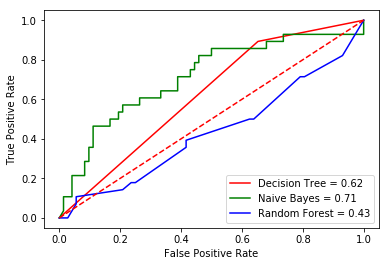

In [8]:
#Plotting ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = test_playlist['class']
decision_tree_prob = [p[1] for p in dtc.predict_proba(test_playlist_X)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(test_playlist_X)]
random_forest_prob = [p[1] for p in rfc.predict_proba(test_playlist_X)]

dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest = %0.2f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion 
Random Forest is performing well for the training dataset with an accuracy of 75%

Naive Bayes is performing well for this test dataset with an accuracy 73%

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by RUTA LAD is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by RUTA LAD is licensed under the MIT License https://opensource.org/licenses/MIT